### Name: Supraja S



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


In [14]:
df = pd.read_csv(r"C:\Users\user\Downloads\senti\Basic_Sentiment_Classification\data.csv")
df

,textID,text,sentiment
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral
3,6099baf6e8,I don`t think will want to come back (guys r...,negative
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral
...,...,...,...
18894,4fdc228bbe,"back at school again. almost weekend. oh wait,...",neutral
18895,07726716b7,Bit devastated that I lost my entire documents...,negative
18896,082b93228a,Last night in Australia,neutral
18897,82d99a5bec,painting,neutral


### EDA and Preprocessing

In [17]:
data=df.dropna()
data

,textID,text,sentiment
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral
3,6099baf6e8,I don`t think will want to come back (guys r...,negative
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral
...,...,...,...
18894,4fdc228bbe,"back at school again. almost weekend. oh wait,...",neutral
18895,07726716b7,Bit devastated that I lost my entire documents...,negative
18896,082b93228a,Last night in Australia,neutral
18897,82d99a5bec,painting,neutral


In [18]:
data.shape

(18898, 3)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18898 entries, 0 to 18898
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     18898 non-null  object
 1   text       18898 non-null  object
 2   sentiment  18898 non-null  object
dtypes: object(3)
memory usage: 590.6+ KB


### Total Distrubution of Text with sentiment

<AxesSubplot:>

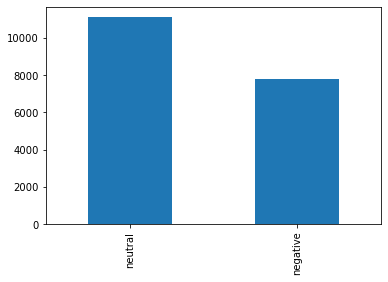

In [23]:
data['sentiment'].value_counts().plot(kind='bar')

In [24]:
data.columns

Index(['textID', 'text', 'sentiment'], dtype='object')

In [25]:
new_df = data[['text','sentiment']]
print(new_df.shape)
new_df.head(5)

(18898, 2)


,text,sentiment
0,that`s enough! I`ll do nothing for 2 hours.,neutral
1,I have to go clothes shopping tomorrow I hate...,negative
2,i am bored. :| any idea`s of a nice site?,neutral
3,I don`t think will want to come back (guys r...,negative
4,_thomas if only the drinking game was tonight....,neutral


In [26]:
new_df['sentiment'].value_counts()

neutral     11117
negative     7781
Name: sentiment, dtype: int64

### Label Encoder

Labels of the data are categorical, by using label encoding we can change the label into numeric.

In [30]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(new_df["sentiment"])

LabelEncoder()

In [31]:
da=(label_encoder.transform(new_df["sentiment"]))
print(da)

[1 0 1 ... 1 1 0]


In [32]:
change={"text":new_df['text'],"Label":da}
final_df=pd.DataFrame(change)
final_df


,text,Label
0,that`s enough! I`ll do nothing for 2 hours.,1
1,I have to go clothes shopping tomorrow I hate...,0
2,i am bored. :| any idea`s of a nice site?,1
3,I don`t think will want to come back (guys r...,0
4,_thomas if only the drinking game was tonight....,1
...,...,...
18894,"back at school again. almost weekend. oh wait,...",1
18895,Bit devastated that I lost my entire documents...,0
18896,Last night in Australia,1
18897,painting,1


## Model

### Logistic Regression

              precision    recall  f1-score   support

           0       0.79      0.53      0.63      1596
           1       0.72      0.90      0.80      2184

    accuracy                           0.74      3780
   macro avg       0.75      0.71      0.71      3780
weighted avg       0.75      0.74      0.73      3780

The accuracy for Logistic Regression is  0.7391534391534391


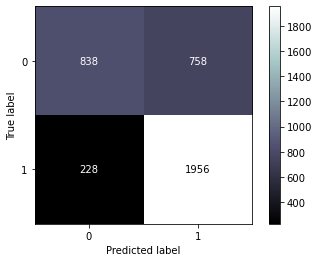

In [37]:
#Logistic
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(final_df.text)
#X
y = final_df.Label
#y
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test,y_pred))
accuracy = accuracy_score (y_test, y_pred)
print("The accuracy for Logistic Regression is ", accuracy)
plot_confusion_matrix(log_reg,X_test,y_test,cmap='bone')

### Support Vector Machine

              precision    recall  f1-score   support

           0       0.81      0.50      0.62      1596
           1       0.71      0.91      0.80      2184

    accuracy                           0.74      3780
   macro avg       0.76      0.71      0.71      3780
weighted avg       0.75      0.74      0.72      3780

0.7386243386243386
              precision    recall  f1-score   support

           0       0.75      0.60      0.67      1596
           1       0.74      0.86      0.80      2184

    accuracy                           0.75      3780
   macro avg       0.75      0.73      0.73      3780
weighted avg       0.75      0.75      0.74      3780

0.7476190476190476
The accuracy for Support Vector Machine is  0.7391534391534391


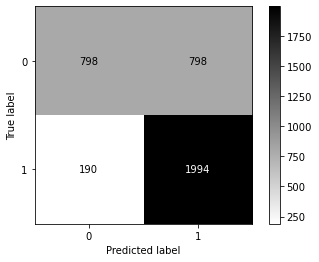

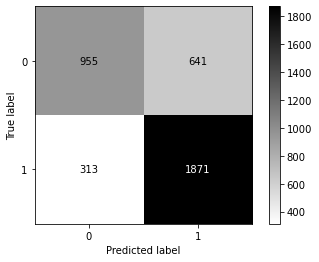

In [39]:
#Support Vector Machine
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(final_df.text)
#X
y = final_df.Label

from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

rbf_svc=SVC()
rbf_svc.fit(X_train,y_train)
linear_svc=LinearSVC()
linear_svc.fit(X_train,y_train)
from sklearn.metrics import plot_confusion_matrix,classification_report
def report(model):
 pred=model.predict(X_test)
 print(classification_report(y_test,pred))
 plot_confusion_matrix(model,X_test,y_test,cmap='binary')
 accuracy = accuracy_score (y_test, pred)
 print(accuracy)
report(rbf_svc)
report(linear_svc)
print("The accuracy for Support Vector Machine is ", accuracy)


### Naive Bayes

              precision    recall  f1-score   support

           0       0.83      0.35      0.50      1596
           1       0.67      0.95      0.78      2184

    accuracy                           0.70      3780
   macro avg       0.75      0.65      0.64      3780
weighted avg       0.73      0.70      0.66      3780

The accuracy for Naive Bayes Classification is  0.6957671957671958


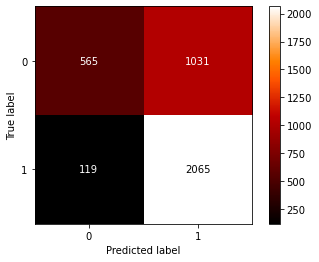

In [40]:
#Naive Bayes
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(final_df.text)
#X
y = final_df.Label

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
nb=MultinomialNB()
nb.fit(X_train,y_train)
preds=nb.predict(X_test)
print(classification_report(y_test,preds))
accuracy = accuracy_score (y_test, preds)
print("The accuracy for Naive Bayes Classification is ", accuracy)
plot_confusion_matrix(nb,X_test,y_test,cmap='gist_heat')

### K-Nearest Neighbor

              precision    recall  f1-score   support

           0       0.63      0.45      0.53      1596
           1       0.67      0.81      0.73      2184

    accuracy                           0.66      3780
   macro avg       0.65      0.63      0.63      3780
weighted avg       0.65      0.66      0.64      3780

The accuracy for KNN classification is  0.6558201058201059


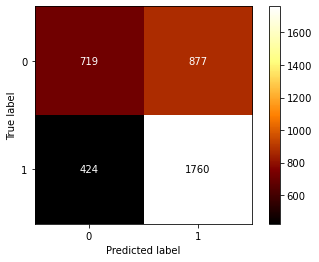

In [41]:
#kNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print(classification_report(y_test,y_pred))
accuracy = accuracy_score (y_test, y_pred)
print("The accuracy for KNN classification is ", accuracy)
plot_confusion_matrix(knn_model,X_test,y_test,cmap='afmhot')

## Analysis

**From all the models of Support Vector Machine, KNN, Logistic Regression, Naive Bayes, the evaluation metric of accuracy is not good. The classification report clearly shows the accurary score, precision, recall.Since the accuracy is low it cannot correctly able to predict whether the given text is negative sentiment or neutral sentiment.This may be due to opinion misclassification,also based on the people who gave text or sometimes model would have not trained better. So I moved to train the dataset using LSTM model (Long Short Term Memory Networks).This model gives better accuracy when compared to all other models and also predicts better.**

### Using LSTM

In [44]:
cas= pd.read_csv(r"C:\Users\user\Downloads\senti\Basic_Sentiment_Classification\data.csv")

In [45]:
df1=cas.dropna()

In [46]:
df1.head()

,textID,text,sentiment
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral
3,6099baf6e8,I don`t think will want to come back (guys r...,negative
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral


In [47]:
df1.columns

Index(['textID', 'text', 'sentiment'], dtype='object')

In [48]:
dataset = df1[['text','sentiment']]
print(dataset.shape)
dataset.head(5)

(18898, 2)


,text,sentiment
0,that`s enough! I`ll do nothing for 2 hours.,neutral
1,I have to go clothes shopping tomorrow I hate...,negative
2,i am bored. :| any idea`s of a nice site?,neutral
3,I don`t think will want to come back (guys r...,negative
4,_thomas if only the drinking game was tonight....,neutral


In [49]:
dataset["sentiment"].value_counts()

neutral     11117
negative     7781
Name: sentiment, dtype: int64

In [50]:
sentiment_label = dataset.sentiment.factorize()
sentiment_label

(array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 Index(['neutral', 'negative'], dtype='object'))

In [54]:
sentence = dataset.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentence)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(sentence)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [55]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'it': 6, 'and': 7, 'you': 8, 'is': 9, 'in': 10, 't': 11, 'for': 12, 's': 13, 'of': 14, 'me': 15, 'on': 16, 'that': 17, 'but': 18, 'so': 19, 'have': 20, 'm': 21, 'just': 22, 'not': 23, 'at': 24, 'with': 25, 'be': 26, 'was': 27, 'can': 28, 'now': 29, 'no': 30, 'this': 31, 'up': 32, 'out': 33, 'get': 34, 'go': 35, 'all': 36, 'like': 37, 'are': 38, 'work': 39, 'do': 40, 'day': 41, 'http': 42, 'going': 43, 'today': 44, 'got': 45, 'what': 46, 'too': 47, 'don': 48, 'one': 49, 'im': 50, 'know': 51, 'we': 52, 'lol': 53, 'from': 54, 'time': 55, 'back': 56, 'your': 57, 'there': 58, 'about': 59, 'am': 60, 'u': 61, 'will': 62, 'really': 63, 'com': 64, 'its': 65, 'want': 66, 'miss': 67, 'they': 68, 'if': 69, '2': 70, 'home': 71, 'how': 72, 'see': 73, 'still': 74, 'some': 75, 'think': 76, 'good': 77, 'when': 78, 'sad': 79, 'more': 80, 'off': 81, 'here': 82, 'had': 83, 'as': 84, 'new': 85, 'oh': 86, 'sorry': 87, 'he': 88, 'has': 89, 'well': 90, 'll': 91, 'n

In [56]:
print(sentence[0])
print(encoded_docs[0])

that`s enough! I`ll do nothing for 2 hours.
[17, 13, 342, 1, 91, 40, 237, 12, 70, 176]


In [57]:
print(padded_sequence[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  17  13 342   1  91  40 237  12
  70 176]


In [60]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           676704    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 693,355
Trainable params: 693,355
Non-trainable params: 0
________________________________________________

In [62]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
473/473 [==============================] - 143s 303ms/step - loss: 0.3331 - accuracy: 0.8638 - val_loss: 0.5929 - val_accuracy: 0.7460
Epoch 2/5
473/473 [==============================] - 144s 304ms/step - loss: 0.3215 - accuracy: 0.8678 - val_loss: 0.5865 - val_accuracy: 0.7479
Epoch 3/5
473/473 [==============================] - 132s 279ms/step - loss: 0.3074 - accuracy: 0.8759 - val_loss: 0.6262 - val_accuracy: 0.7519
Epoch 4/5
473/473 [==============================] - 115s 242ms/step - loss: 0.2936 - accuracy: 0.8805 - val_loss: 0.6228 - val_accuracy: 0.7484
Epoch 5/5
473/473 [==============================] - 120s 253ms/step - loss: 0.2833 - accuracy: 0.8850 - val_loss: 0.6537 - val_accuracy: 0.7474


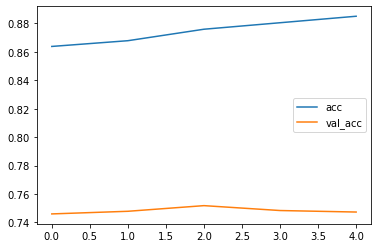

In [66]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

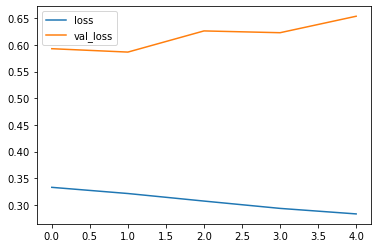

In [67]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [68]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [69]:
test_sentence1 = "She is angry on her sister"
predict_sentiment(test_sentence1)

test_sentence2 = "Rita went to school"
predict_sentiment(test_sentence2)

Predicted label:  negative
Predicted label:  neutral


#### From the above,using LSTM also the accuracy is not too high, but it could able to predict whether the given text is neutral or negative sentiment.